# **I- Algorithme de conversion en signature thermique avec l'équation de Pennes**

Température ambiante Te (°C) : 20
Température maximale Tmax (°C) : 35
Température à distance a, Ta (°C) : 33
Distance latérale a (cm) : 1
=== PARAMÈTRES ESTIMÉS ===
 Profondeur d  = 2.55 cm
 Rayon     R   = 0.01 cm
 Intensité Q   = 1.075 W


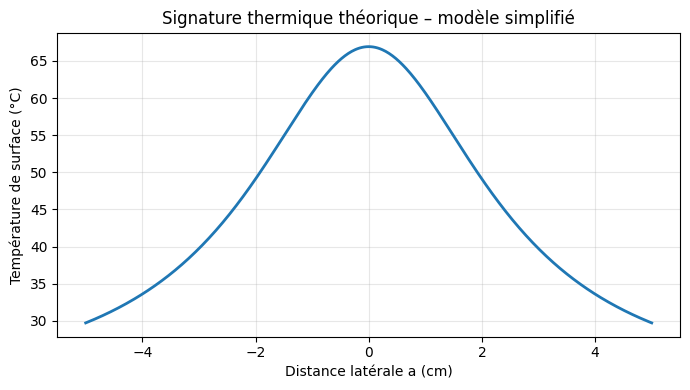

In [ ]:
# ============================================================
# THERMAL PROFILE ESTIMATOR (Rastgar-Jazi & Mohammadi, 2017)
#
# Implémente les équations :
#   (16)  T(a)
#   (17)  d      = a * sqrt[(T(a)-Te)/(Tmax-T(a))]
#   (18)  Q      = 4πh0 (T(a)-Te)(Tmax-Te) a² / (Tmax-T(a))
#   (20)  R³     = (Ta_blood - Te)(a² + d²) / [4π h0 q_m 10⁶]
#
# Donne : d (profondeur), Q (puissance thermique) et R (rayon),
# puis trace le profil théorique de surface T(a).
# ============================================================

import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# === 1. Constantes du code source des brésiliens  ===========
# ------------------------------------------------------------
h0  = 8.77          # W m⁻² K⁻¹  — coefficient d’échange convectif
Ta_blood = 310.15   # K          — T° artérielle ≈ 37 °C
qm  = 700           # W m⁻³      — métabolisme tissu sain

# ------------------------------------------------------------
# === 2. Données d’entrée (saisies utilisateur) ==============
# ------------------------------------------------------------

# MODIFICATION APPORTEE
def C2K(Tc): return Tc + 273.15 # Conversion °C -> Kelvin

# Demander les entrées utilisateur
Te_C   = float(input("Température ambiante Te (°C) : "))
Tmax_C = float(input("Température maximale Tmax (°C) : "))
Ta_C   = float(input("Température à distance a, Ta (°C) : "))
a_cm   = float(input("Distance latérale a (cm) : "))

# Conversion en unité SI
Te   = C2K(Te_C)
Tmax = C2K(Tmax_C)
Ta   = C2K(Ta_C)
a    = a_cm / 100.0          # cm en m

# ------------------------------------------------------------
# === 3. Equations provenant de l'équation de Pennes =========
# ------------------------------------------------------------
# MODELISATION MATHEMATIQUE (équation (17), (18), (20), (16) de l'article RASTGAR-JAZI & MOHAMMADI, 2017)
def eq17_depth_d(Ta, Tmax, Te, a):
    """Profondeur d (m) — équation (17)."""
    return a * np.sqrt((Ta - Te) / (Tmax - Ta))

def eq18_intensity_Q(Ta, Tmax, Te, a, h0=h0):
    """Puissance thermique Q (W) — équation (18)."""
    return (4 * np.pi * h0 * (Ta - Te) * (Tmax - Te) * a**2) / (Tmax - Ta)

def eq20_radius_R(d, a, Ta_blood=Ta_blood, Te=Te, h0=h0, qm=qm):
    """Rayon R (m) — équation (20)."""
    R3 = (Ta_blood - Te) * (a**2 + d**2) / (4 * np.pi * h0 * qm * 1e6)
    return np.cbrt(R3)

def eq16_T_profile(a_vec, Te, d, R, Q, h0=h0):
    """Profil théorique T(a) — équation (16)."""
    return Te + Q / (4 * h0 * ((d + R)**2 + a_vec**2))

# ------------------------------------------------------------
# === 4. Calcul des paramètres ===============================
# ------------------------------------------------------------

# MODIFICATION APPORTEE
d_est = eq17_depth_d(Ta, Tmax, Te, a)
Q_est = eq18_intensity_Q(Ta, Tmax, Te, a)
R_est = eq20_radius_R(d_est, a)

# ------------------------------------------------------------
# === 5. Affichage des résultats =============================
# ------------------------------------------------------------
print("=== PARAMÈTRES ESTIMÉS ===")
print(f" Profondeur d  = {d_est*100:.2f} cm")
print(f" Rayon     R   = {R_est*100:.2f} cm")
print(f" Intensité Q   = {Q_est:.3f} W")

# ------------------------------------------------------------
# === 6. Traçage de la courbe T(a) ===========================
# ------------------------------------------------------------
a_range = np.linspace(-0.05, 0.05, 501)               # ±5 cm
T_profile = eq16_T_profile(a_range, Te, d_est, R_est, Q_est)

plt.figure(figsize=(7,4))
plt.plot(a_range*100, T_profile - 273.15, lw=2)
plt.xlabel("Distance latérale a (cm)")
plt.ylabel("Température de surface (°C)")
plt.title("Signature thermique théorique – modèle simplifié")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


**Te_C     = 20°C** → Température ambiante (ex. pièce contrôlée)  
**Tmax_C   = 35°C à 39°C** → Pixel le plus chaud (image IR)  
**Ta_C     = 33°C à 37°C** → Pixel à distance a (image IR)  
**a_cm     = 1.0cm** → Distance physique entre Tmax et Ta  

# **II- Impact de Tmax**

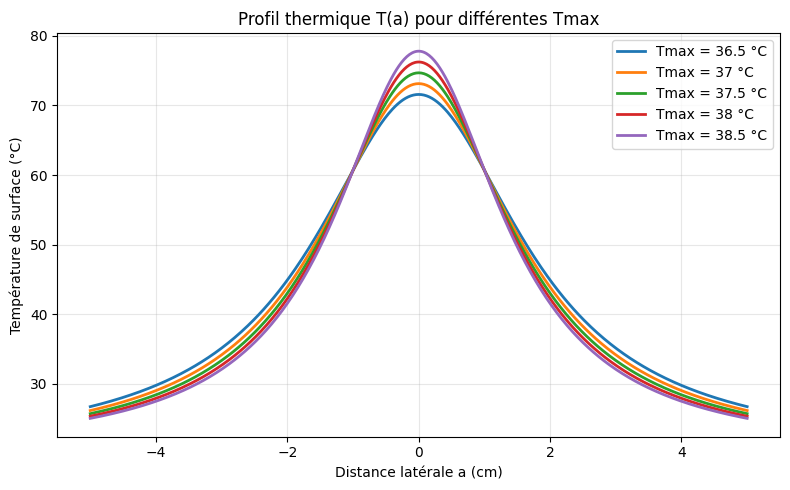

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes (comme dans le script)
h0  = 8.77          # W m⁻² K⁻¹
Ta_blood = 310.15   # K
qm  = 700           # W m⁻³

def C2K(Tc): return Tc + 273.15

def eq17_depth_d(Ta, Tmax, Te, a):
    return a * np.sqrt((Ta - Te) / (Tmax - Ta))

def eq18_intensity_Q(Ta, Tmax, Te, a, h0=h0):
    return (4 * np.pi * h0 * (Ta - Te) * (Tmax - Te) * a**2) / (Tmax - Ta)

def eq20_radius_R(d, a, Ta_blood=Ta_blood, Te=Te, h0=h0, qm=qm):
    R3 = (Ta_blood - Te) * (a**2 + d**2) / (4 * np.pi * h0 * qm * 1e6)
    return np.cbrt(R3)

def eq16_T_profile(a_vec, Te, d, R, Q, h0=h0):
    return Te + Q / (4 * h0 * ((d + R)**2 + a_vec**2))

# Fixe les valeurs constantes
Te_C = 20.0
Ta_C = 33.0
a_cm = 1.0

# Convertir en Kelvin et m
Te = C2K(Te_C)
Ta = C2K(Ta_C)
a = a_cm / 100

# Liste des Tmax à tester (°C)
Tmax_list_C = [36.5, 37, 37.5, 38, 38.5]

a_range = np.linspace(-0.05, 0.05, 501)  # ±5 cm

plt.figure(figsize=(8,5))

for Tmax_C in Tmax_list_C:
    Tmax = C2K(Tmax_C)
    # Calculs des paramètres
    d_est = eq17_depth_d(Ta, Tmax, Te, a)
    Q_est = eq18_intensity_Q(Ta, Tmax, Te, a)
    R_est = eq20_radius_R(d_est, a, Ta_blood=Ta_blood, Te=Te, h0=h0, qm=qm)

    # Calcul profil thermique
    T_profile = eq16_T_profile(a_range, Te, d_est, R_est, Q_est)

    # Trace en °C
    plt.plot(a_range*100, T_profile - 273.15, lw=2, label=f"Tmax = {Tmax_C} °C")

plt.xlabel("Distance latérale a (cm)")
plt.ylabel("Température de surface (°C)")
plt.title("Profil thermique T(a) pour différentes Tmax")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


# **III- Impact de Ta**

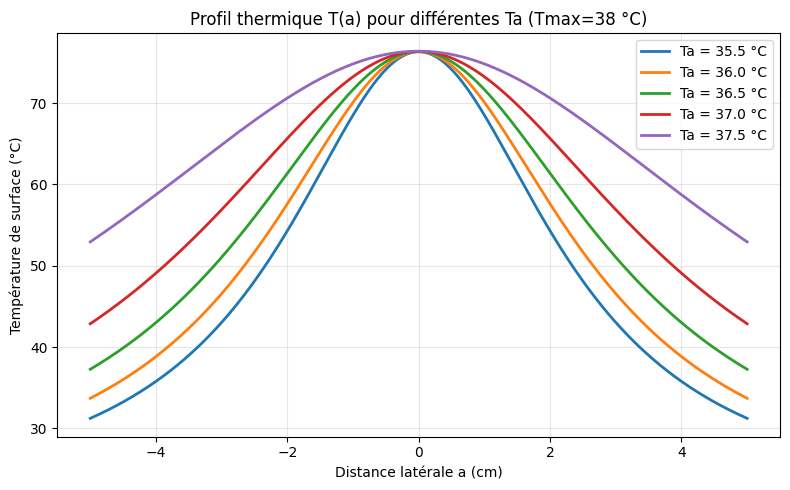

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
h0  = 8.77          # W m⁻² K⁻¹
Ta_blood = 310.15   # K
qm  = 700           # W m⁻³

def C2K(Tc): return Tc + 273.15

def eq17_depth_d(Ta, Tmax, Te, a):
    return a * np.sqrt((Ta - Te) / (Tmax - Ta))

def eq18_intensity_Q(Ta, Tmax, Te, a, h0=h0):
    return (4 * np.pi * h0 * (Ta - Te) * (Tmax - Te) * a**2) / (Tmax - Ta)

def eq20_radius_R(d, a, Ta_blood=Ta_blood, Te=Te, h0=h0, qm=qm):
    R3 = (Ta_blood - Te) * (a**2 + d**2) / (4 * np.pi * h0 * qm * 1e6)
    return np.cbrt(R3)

def eq16_T_profile(a_vec, Te, d, R, Q, h0=h0):
    return Te + Q / (4 * h0 * ((d + R)**2 + a_vec**2))

# Valeurs fixes
Te_C = 20.0
Tmax_C = 38.0
a_cm = 1.0

Te = C2K(Te_C)
Tmax = C2K(Tmax_C)
a = a_cm / 100

# Ta varie de 35.5 à 37.5 par pas de 0.5 (toujours < Tmax)
Ta_list_C = np.arange(35.5, 38.0, 0.5)

a_range = np.linspace(-0.05, 0.05, 501)  # ±5 cm

plt.figure(figsize=(8,5))

for Ta_C in Ta_list_C:
    Ta = C2K(Ta_C)
    # Calculs
    d_est = eq17_depth_d(Ta, Tmax, Te, a)
    Q_est = eq18_intensity_Q(Ta, Tmax, Te, a)
    R_est = eq20_radius_R(d_est, a, Ta_blood=Ta_blood, Te=Te, h0=h0, qm=qm)

    T_profile = eq16_T_profile(a_range, Te, d_est, R_est, Q_est)

    plt.plot(a_range*100, T_profile - 273.15, lw=2, label=f"Ta = {Ta_C} °C")

plt.xlabel("Distance latérale a (cm)")
plt.ylabel("Température de surface (°C)")
plt.title("Profil thermique T(a) pour différentes Ta (Tmax=38 °C)")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


# **IV- Impact de Q**  
Sachant que Q est calculé à partir des températures d'entrées

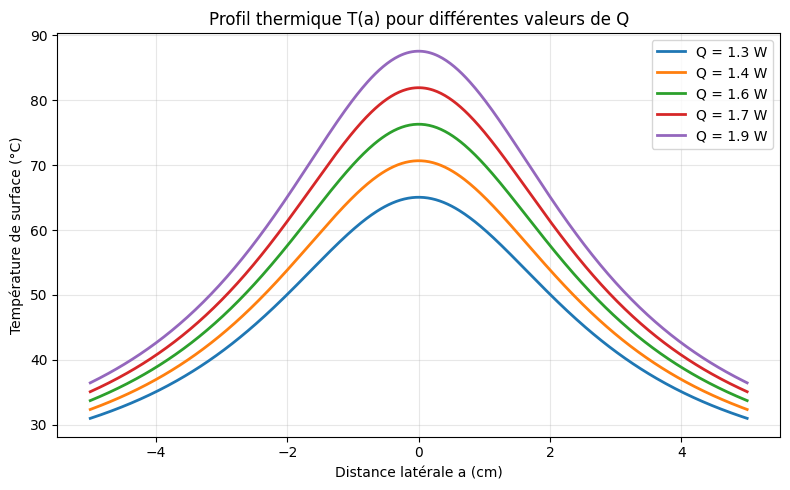

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
h0  = 8.77          # W m⁻² K⁻¹
Ta_blood = 310.15   # K
qm  = 700           # W m⁻³

def C2K(Tc): return Tc + 273.15

def eq17_depth_d(Ta, Tmax, Te, a):
    return a * np.sqrt((Ta - Te) / (Tmax - Ta))

def eq18_intensity_Q(Ta, Tmax, Te, a, h0=h0):
    return (4 * np.pi * h0 * (Ta - Te) * (Tmax - Te) * a**2) / (Tmax - Ta)

def eq20_radius_R(d, a, Ta_blood=Ta_blood, Te=Te, h0=h0, qm=qm):
    R3 = (Ta_blood - Te) * (a**2 + d**2) / (4 * np.pi * h0 * qm * 1e6)
    return np.cbrt(R3)

def eq16_T_profile(a_vec, Te, d, R, Q, h0=h0):
    return Te + Q / (4 * h0 * ((d + R)**2 + a_vec**2))

# Valeurs fixes
Te_C = 20.0
Tmax_C = 38.0
Ta_C = 36.0
a_cm = 1.0

Te = C2K(Te_C)
Tmax = C2K(Tmax_C)
Ta = C2K(Ta_C)
a = a_cm / 100

# Calcul d et R fixes (Q va varier "manuellement")
d_est = eq17_depth_d(Ta, Tmax, Te, a)
R_est = eq20_radius_R(d_est, a, Ta_blood=Ta_blood, Te=Te, h0=h0, qm=qm)
Q_est = eq18_intensity_Q(Ta, Tmax, Te, a)

# Générer plusieurs Q autour de Q_est (par exemple 80% à 120%)
Q_values = np.linspace(0.8*Q_est, 1.2*Q_est, 5)

a_range = np.linspace(-0.05, 0.05, 501)  # ±5 cm

plt.figure(figsize=(8,5))

for Q in Q_values:
    T_profile = eq16_T_profile(a_range, Te, d_est, R_est, Q)
    plt.plot(a_range*100, T_profile - 273.15, lw=2, label=f"Q = {Q:.1f} W")

plt.xlabel("Distance latérale a (cm)")
plt.ylabel("Température de surface (°C)")
plt.title("Profil thermique T(a) pour différentes valeurs de Q")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()
